In [ ]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding= 'ISO-8859-1')

In [ ]:
def tokenize(column):
  tokens = nltk.word_tokenize(column)
  return[w for w in tokens if w.isalpha()]

import nltk

nltk.download('punkt')  

df['tokenized'] = df.apply(lambda x: tokenize(x['v2']), axis =1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
def remove_stopwords(tokenized_column):

  stop = set(stopwords.words("english"))
  return [ w for w in tokenized_column if not w in stop]

In [ ]:
import nltk
from nltk.corpus import stopwords
df['no_stopwords'] = df.apply(lambda x: remove_stopwords(x['tokenized']), axis = 1)

In [ ]:
from nltk.stem import *

def stemming_fun(tokenized_column):
  stemmer = PorterStemmer()
  return [stemmer.stem(word) for word in tokenized_column]

In [ ]:
df['after_stemmer'] = df.apply(lambda x: stemming_fun(x['no_stopwords']), axis=1)

In [ ]:
def rejoin(tokenized_column):
  return(" ".join(tokenized_column))

In [ ]:
df['cleaned_text'] = df.apply(lambda x: rejoin(x['after_stemmer']), axis=1)

In [ ]:
df.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','tokenized','no_stopwords','after_stemmer'], inplace = True)

In [ ]:
df["target"] = [0 if value == "ham" else 1 for value in df["v1"]]

In [ ]:
X = df['v2']
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#print(X_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [ ]:
X_train_array = np.empty([0, 3900])
X_train_array = np.vstack([X_train_array, X_train.index]) 
X_train_array = np.vstack([X_train_array, X_train.values])

y_train_array = np.empty([0,3900])
y_train_array = np.vstack([y_train_array, y_train.values]) 

X_test_array = np.empty([0, 1672])
X_test_array = np.vstack([X_test_array, X_test.index]) 
X_test_array = np.vstack([X_test_array, X_test.values])

y_test_array = np.empty([0, 1672])
y_test_array = np.vstack([y_test_array, y_test.values]) 

In [ ]:
import re
stop = nltk.corpus.stopwords.words('english')
porter = nltk.PorterStemmer()


def preprocess_text(messy_string):
    assert(type(messy_string) == str)
    cleaned = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', messy_string)
    cleaned = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     cleaned)
    cleaned = re.sub(r'£|\$', 'moneysymb', cleaned)
    cleaned = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', cleaned)
    cleaned = re.sub(r'\d+(\.\d+)?', 'numbr', cleaned)
    cleaned = re.sub(r'[^\w\d\s]', ' ', cleaned)
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = re.sub(r'^\s+|\s+?$', '', cleaned.lower())
    return ' '.join(
        porter.stem(term) 
        for term in cleaned.split()
        if term not in set(stop)
    )

In [ ]:
# Decision Tree
def DecisionTree_parameterless():
  from sklearn import tree
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import confusion_matrix
  import pandas as pd
  

  classifier = tree.DecisionTreeClassifier()

  classifier.fit(X_train_vectorized.toarray(), y_train_array.reshape(-1, 1).ravel())

  predictions_dtree = classifier.predict(vect.transform(X_test).toarray())

  aucscore = round(roc_auc_score(y_test_array.reshape(-1,1), predictions_dtree) * 100, 2)
  acc_decision_tree = round(classifier.score(vect.transform(X_test).toarray(), y_test_array.reshape(-1, 1)) * 100, 2)
  

  print("Decision Tree: ")
  print("Roc Auc Score: ", aucscore)
  print("Accuracy: ",acc_decision_tree)
  print()

# Logistic Regression
def LogisticRegression_parameterless():
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score

  reg = LogisticRegression(random_state=42,class_weight='auto')
  reg.fit(X_train_vectorized.toarray(), y_train_array.reshape(-1, 1).ravel())


  predictions_reg = reg.predict(vect.transform(X_test).toarray())

  aucscore_reg = round(roc_auc_score(y_test_array.reshape(-1,1), predictions_reg) * 100, 2)
  acc_logistic_regression = round(reg.score(vect.transform(X_test).toarray(), y_test_array.reshape(-1, 1)) * 100, 2)

  print("Logistic Regression: ")
  print("Roc Auc Score: ", aucscore_reg)
  print("Accuracy: ", acc_logistic_regression)
  print()


# Naive Bayes
def NaiveBayes_parameterless():
  from sklearn.naive_bayes import GaussianNB
  from sklearn.metrics import roc_auc_score
  from scipy.sparse import csr_matrix

  nb = GaussianNB()

  model_fit = nb.fit(X_train_vectorized.toarray(), y_train_array.reshape(-1, 1).ravel())
  predictions_nb = nb.predict(vect.transform(X_test).toarray())

  aucscore = round(roc_auc_score(y_test_array.reshape(-1,1), predictions_nb) * 100, 2)
  acc_naive_bayes = round(nb.score(vect.transform(X_test).toarray(), y_test_array.reshape(-1, 1)) * 100, 2)


  print("Naive Bayes: ")
  print("Roc Auc Score: ", aucscore)
  print("Accuracy: ",acc_naive_bayes)
  print()

  # conf_nb = pd.DataFrame(
  #     metrics.confusion_matrix(y_test, predictions_nb),
  #     index=[['actual nb', 'actual nb'], ['spam', 'ham']],
  #     columns=[['predicted nb', 'predicted nb'], ['spam', 'ham']])
  
  # return conf_nb


In [ ]:
# Ham = 0, Spam = 1

# Decision Tree
def DecisionTree(textString):
  from sklearn import tree
  from sklearn.metrics import roc_auc_score
  import re
  from sklearn.metrics import plot_confusion_matrix

  dtree = tree.DecisionTreeClassifier()

  dtree.fit(X_train_vectorized.toarray(), y_train_array.reshape(-1, 1).ravel())

  predictions_tree = dtree.predict(vect.transform([textString]).toarray())

  acc_decision_tree = round(dtree.score(vect.transform(X_test).toarray(), y_test_array.reshape(-1, 1)) * 100, 2)

  answer = ""
  if predictions_tree == 0:
    answer = "ham"
  else:
    answer = "spam"

 

  print("Decision Tree: ")
  print(f"Inputted text is {answer} with accuracy of the model being {acc_decision_tree}")
  print()


# Logistic Regression
def LogisticRegression(textString):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score
  import re

  reg = LogisticRegression(random_state = 42,class_weight='auto')
  reg.fit(X_train_vectorized.toarray(), y_train_array.reshape(-1, 1).ravel())

  predictions_reg = reg.predict(vect.transform([textString]).toarray())


  acc_logistic_regression = round(reg.score(vect.transform(X_test).toarray(), y_test_array.reshape(-1, 1)) * 100, 2)

  answer_reg = ""
  if predictions_reg[[0]] == 0:
    answer_reg = "ham"
  else:
    answer_reg = "spam"

  print("Logistic Regression: ")
  print(f"Inputted text is {answer_reg} with accuracy of the model being {acc_logistic_regression}")
  print()

# Naive Bayes
def NaiveBayes(textString):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.metrics import roc_auc_score
  import re
  from sklearn.metrics import accuracy_score

  nb = GaussianNB()

  model_fit = nb.fit(X_train_vectorized.toarray(), y_train_array.reshape(-1, 1).ravel())
  predictions_nb = nb.predict(vect.transform([textString]).toarray())

  acc_naive_bayes = round(nb.score(vect.transform(X_test).toarray(), y_test_array.reshape(-1, 1)) * 100, 2)

  answer_nb = ""
  if predictions_nb[0] == 0:
    answer_nb = "ham"
  else:
    answer_nb = "spam"
  

  print("Naive Bayes: ")
  print(f"Inputted text is {answer_nb} with accuracy of the model being {acc_naive_bayes}")
  print()


In [ ]:
DecisionTree_parameterless()
LogisticRegression_parameterless()
NaiveBayes_parameterless()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

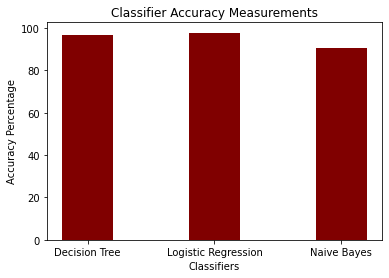

In [ ]:
import matplotlib.pyplot as plt

classifiers = ["Decision Tree", "Logistic Regression", "Naive Bayes"]
values = [96.65, 97.79, 90.43]

plt.bar(classifiers, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Percentage")
plt.title("Classifier Accuracy Measurements")
plt.show()

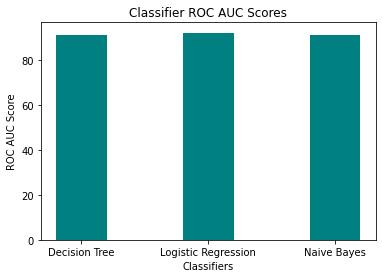

In [ ]:
import matplotlib.pyplot as plt

classifiers = ["Decision Tree", "Logistic Regression", "Naive Bayes"]
values = [91.29, 92.13, 91]

plt.bar(classifiers, values, color ='teal',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("ROC AUC Score")
plt.title("Classifier ROC AUC Scores")
plt.show()

In [ ]:
# Take user input here

userInputString = input("Enter a string of text: ")

Enter a string of text: strokes are cool


In [ ]:
DecisionTree(userInputString)
LogisticRegression(userInputString)
NaiveBayes(userInputString)

Decision Tree: 
Inputted text is ham with accuracy of the model being 96.47

Logistic Regression: 
Inputted text is ham with accuracy of the model being 97.79

Naive Bayes: 
Inputted text is spam with accuracy of the model being 90.43



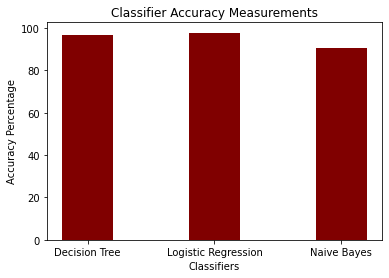

In [ ]:
import matplotlib.pyplot as plt

classifiers = ["Decision Tree", "Logistic Regression", "Naive Bayes"]
values = [96.59, 97.79, 90.43]

plt.bar(classifiers, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Percentage")
plt.title("Classifier Accuracy Measurements")
plt.show()

Text(0.5, 1.0, 'Ham and Spam Total Distribution')

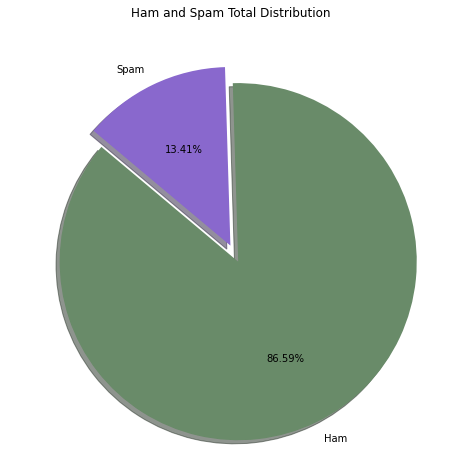

In [ ]:
from sys import platform
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [8,10]
lab = 'Ham', 'Spam'
explode = (0.1, 0)  
colors = ['#698B69','#8968CD']
plt.pie(df.v1.value_counts(),autopct='%1.2f%%',explode=explode, labels = lab, shadow=True, startangle=140, colors = colors)
plt.title("Ham and Spam Total Distribution")



Text(0.5, 1.0, 'Total distribution')

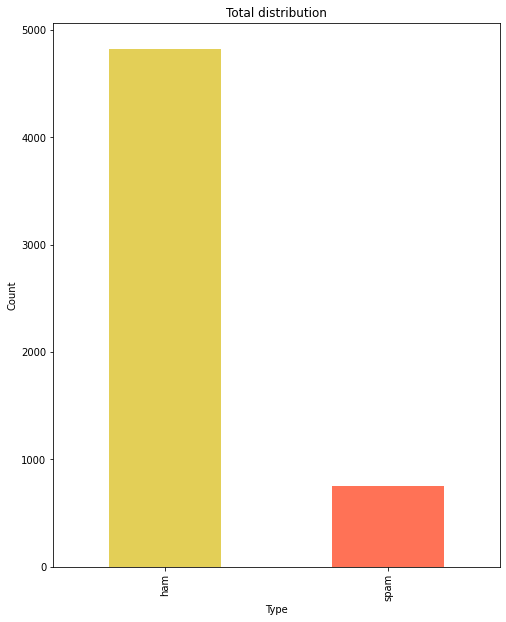

In [ ]:
df['v1'].value_counts().plot(kind='bar', color =['#E3CF57','#FF7256'])
plt.xlabel("Type")
plt.ylabel('Count')
plt.title("Total distribution")


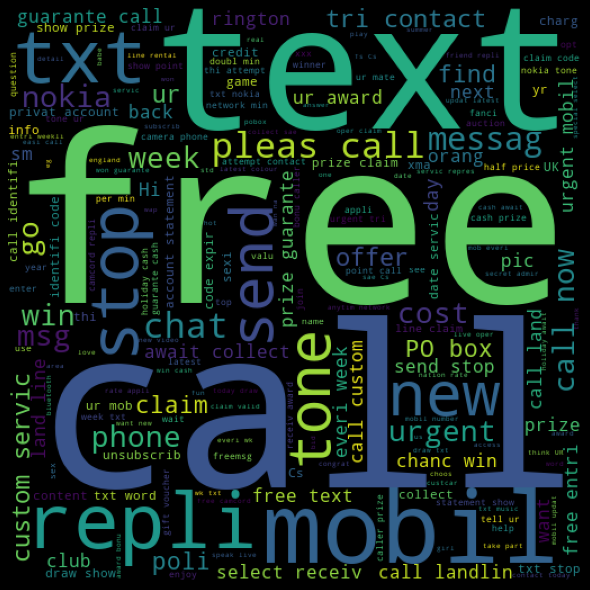

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


spam_words=' '.join(list(df[df['target']==1]['cleaned_text']))
spam_wc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


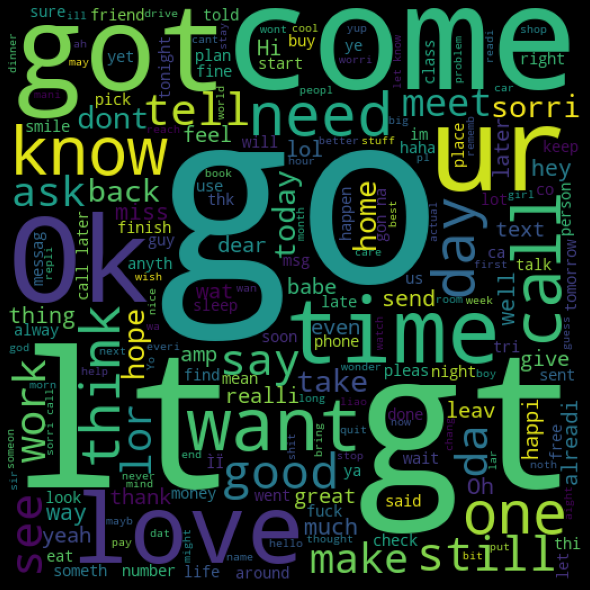

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


ham_words=' '.join(list(df[df['target']==0]['cleaned_text']))
ham_wc = WordCloud(width = 512, height=512).generate(ham_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()